<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/TimeSeries_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reading Time Series Objects**

In [1]:
#importing required functions
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
#writing parsing function for the date time column
from datetime import datetime
#dates read in format - YYYY-MM-DD HH:MM:SS
date_parser_fn = lambda dates: datetime.strptime(dates, '%Y-%m')

In [10]:
URL = 'https://raw.githubusercontent.com/AileenNielsen/TimeSeriesAnalysisWithPython/master/data/AirPassengers.csv'
data = pd.read_csv(URL, parse_dates=['Month'], index_col='Month', date_parser=date_parser_fn)

<ipython-input-10-43dba64c8ed3>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(URL, parse_dates=['Month'], index_col='Month', date_parser=date_parser_fn)


In [5]:
data.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [11]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


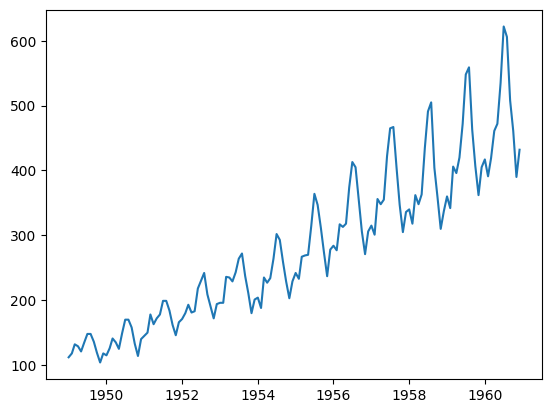

In [12]:
plt.plot(data)
plt.show()

## Reading Time Series Objects (India GDP data)

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [16]:
#read india GDP time series data
GDP_URL = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/India_GDP_Data.csv'
india_gdp_data = pd.read_csv(GDP_URL, header = 0)

In [17]:
india_gdp_data.head()

,Year,GDP_In_Billion_USD,Per_Capita_in_USD,Percentage_Growth
0,2021,3173.40,2277,8.95
1,2020,2667.69,1933,-6.60
2,2019,2831.55,2072,3.74
3,2018,2702.93,1998,6.45
4,2017,2651.47,1981,6.80


In [21]:
date_range = pd.date_range(start='1/1/1960', end = '31/12/2021', freq='A')
# Reverse the date_range
date_range_reversed = date_range[::-1]
date_range_reversed

DatetimeIndex(['2021-12-31', '2020-12-31', '2019-12-31', '2018-12-31',
               '2017-12-31', '2016-12-31', '2015-12-31', '2014-12-31',
               '2013-12-31', '2012-12-31', '2011-12-31', '2010-12-31',
               '2009-12-31', '2008-12-31', '2007-12-31', '2006-12-31',
               '2005-12-31', '2004-12-31', '2003-12-31', '2002-12-31',
               '2001-12-31', '2000-12-31', '1999-12-31', '1998-12-31',
               '1997-12-31', '1996-12-31', '1995-12-31', '1994-12-31',
               '1993-12-31', '1992-12-31', '1991-12-31', '1990-12-31',
               '1989-12-31', '1988-12-31', '1987-12-31', '1986-12-31',
               '1985-12-31', '1984-12-31', '1983-12-31', '1982-12-31',
               '1981-12-31', '1980-12-31', '1979-12-31', '1978-12-31',
               '1977-12-31', '1976-12-31', '1975-12-31', '1974-12-31',
               '1973-12-31', '1972-12-31', '1971-12-31', '1970-12-31',
               '1969-12-31', '1968-12-31', '1967-12-31', '1966-12-31',
      

In [23]:
india_gdp_data['TimeIndex'] = pd.DataFrame(date_range_reversed, columns=['Year'])
indian_gdp_data = india_gdp_data[['Year', 'Per_Capita_in_USD','TimeIndex']]
indian_gdp_data.head(5).T

,0,1,2,3,4
Year,2021,2020,2019,2018,2017
Per_Capita_in_USD,2277,1933,2072,1998,1981
TimeIndex,2021-12-31 00:00:00,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-31 00:00:00


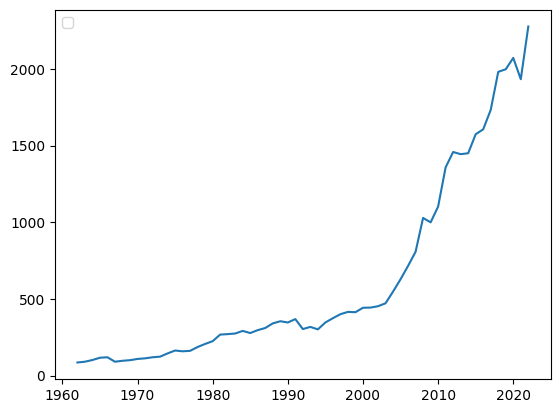

In [26]:
plt.plot(indian_gdp_data.TimeIndex, indian_gdp_data.Per_Capita_in_USD)
plt.legend(loc='upper left')
plt.show()

# **Saving Time Series Objects**

In [29]:
#saving TS object as csv
data.to_csv('ts_data.csv', index=True, sep=',')

#check obj stored
data1 = pd.read_csv('ts_data.csv', header=0)
print(data1.head(2).T)

                      0           1
Month        1949-01-01  1949-02-01
#Passengers         112         118


# **Exploring Types of Time-Series Data**

## Univariate
Univariate data refers to data that consists of observations on only a single characteristic or attribute. This type of data involves only one variable, hence the prefix "uni-", which means "one." Univariate analysis, therefore, is the simplest form of analyzing data.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
#read the TS dats
URL_minTemp = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/daily-min-temperatures.csv'
data_df = pd.read_csv(URL_minTemp, header=0, index_col=0, parse_dates=True)

# Check if the DataFrame has only one column and convert to Series if true
if len(data_df.columns) == 1:
    data = data_df.iloc[:, 0]
else:
    data = data_df

# Show the first few rows of the data
print(data.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


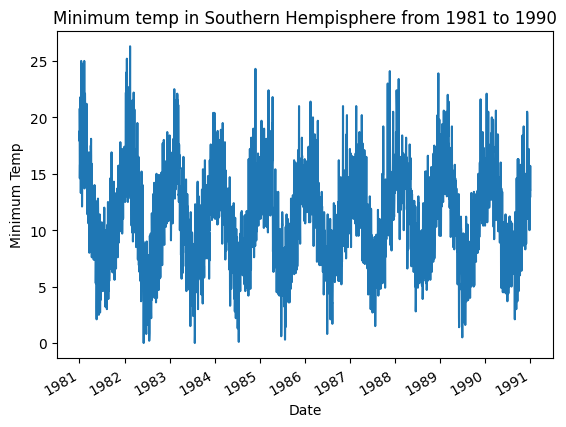

In [34]:
#plotting
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Minimum temp in Southern Hempisphere from 1981 to 1990')
plt.show()

## Multi-variate

In [37]:
#beijing opulation dataset

#writing parsing function
def parse(x):
  return datetime.strptime(x, '%Y %m %d %H')

In [46]:
#load the dataset
URL_beijing_pop = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/raw.csv'
beijing_pop_data = pd.read_csv(URL_beijing_pop, parse_dates=[['year','month','day','hour']], index_col=0, date_parser=parse)
beijing_pop_data.head()

<ipython-input-46-0358f71078dc>:3: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  beijing_pop_data = pd.read_csv(URL_beijing_pop, parse_dates=[['year','month','day','hour']], index_col=0, date_parser=parse)


,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [48]:
#basic pre-processing
beijing_pop_data.drop('No', axis=1, inplace=True)

beijing_pop_data.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

# Set the index name
beijing_pop_data.index.name = 'date'

In [53]:
#marking NA values with 0
beijing_pop_data['pollution'].fillna(0, inplace=True)
beijing_pop_data.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0


In [55]:
#drop the first 24 hrs
beijing_pop_data = beijing_pop_data[24:]
print(beijing_pop_data.head(5))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-03 00:00:00       90.0   -7  -6.0  1027.0      SE    58.56     4     0
2010-01-03 01:00:00       63.0   -8  -6.0  1026.0      SE    61.69     5     0
2010-01-03 02:00:00       65.0   -8  -7.0  1026.0      SE    65.71     6     0
2010-01-03 03:00:00       55.0   -8  -7.0  1025.0      SE    68.84     7     0
2010-01-03 04:00:00       65.0   -8  -7.0  1024.0      SE    72.86     8     0


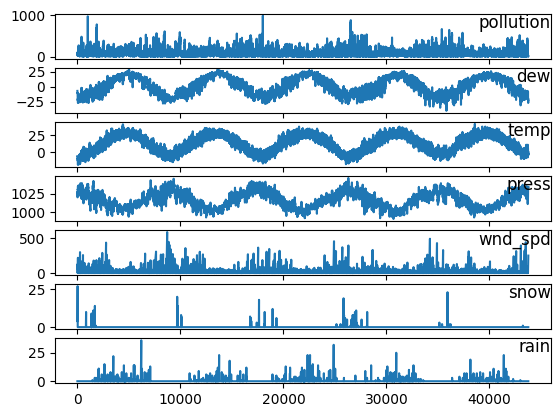

In [57]:
#plotting each series
vals = beijing_pop_data.values

#specify columns to plot
group_list = [0,1,2,3,5,6,7]
i=1

#plot each column
plt.figure()

for group in group_list:
  plt.subplot(len(group_list),1,i)
  plt.plot(vals[:,group])
  plt.title(beijing_pop_data.columns[group], y=0.5, loc='right')
  i +=1

plt.show()

# **Time Series Components**

## **Trends**(downward/ upward)

In [66]:
#import librarries
#writing parsing function
def parsing_fun(x):
  return datetime.strptime('190'+x, '%Y-%m')

#loading the dataset
URL_Sales = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/shampoo-sales.csv'
data_shampoo_sales = pd.read_csv(URL_Sales, header=0, parse_dates=[0], index_col=0, date_parser=parsing_fun)

# Check if the DataFrame has only one column and convert to Series if true
if len(data_shampoo_sales.columns) == 1:
    data = data_shampoo_sales.iloc[:, 0]
else:
    data = data_shampoo_sales

data.head()

<ipython-input-66-2d475d58bdac>:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data_shampoo_sales = pd.read_csv(URL_Sales, header=0, parse_dates=[0], index_col=0, date_parser=parsing_fun)


Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

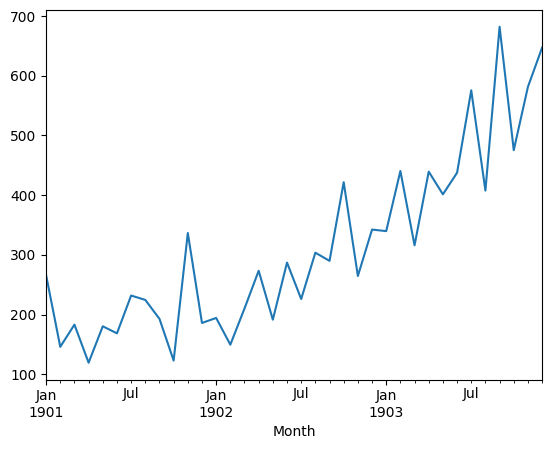

In [67]:
data.plot()
plt.show()

## **Seasonality**

In [77]:
#melbourne dailt temp dataset

URL_aus_temp = 'https://raw.githubusercontent.com/Apress/time-series-algorithm-recipes/master/data/daily-min-temperatures.csv'
data_aus_temp = pd.read_csv(URL_aus_temp, header=0, index_col=0, parse_dates=True)

# Check if the DataFrame has only one column and convert to Series if true
if len(data_aus_temp.columns) == 1:
    data = data_aus_temp.iloc[:, 0]
else:
    data = data_aus_temp

# Show the first few rows of the data
print(data.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


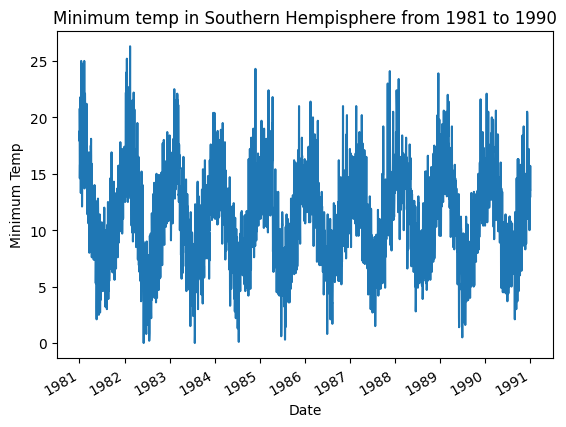

In [79]:
#plotting
data.plot()
plt.ylabel('Minimum Temp')
plt.title('Minimum temp in Southern Hempisphere from 1981 to 1990')
plt.show()

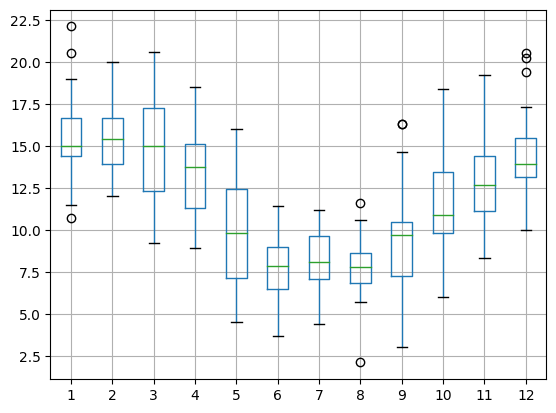

In [81]:
#Box plot by month
month_df = pd.DataFrame()
one_year_ser = data['1990']
grouped_df = one_year_ser.groupby(pd.Grouper(freq='M'))

month_df = pd.concat([pd.DataFrame(x[1].values) for x in grouped_df], axis=1)
month_df = pd.DataFrame(month_df)
month_df.columns = range(1,13)
month_df.boxplot()
plt.show()

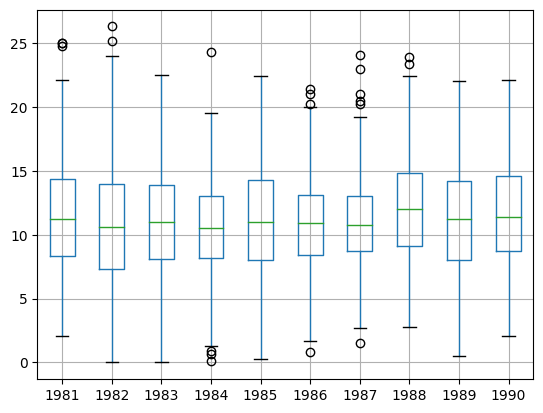

In [82]:
#box plot by year
grouped_ser = data.groupby(pd.Grouper(freq='A'))
year_df = pd.DataFrame()

for name, group in grouped_ser:
  year_df[name.year] = group.values

year_df.boxplot()
plt.show()

## Seasonality (contd.)